In [53]:
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


In [54]:
librosa.load(audio_data, sr=44100)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

In [55]:
librosa.load(audio_data, sr=None)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

In [3]:
import IPython.display as ipd
ipd.Audio(audio_data)

NameError: name 'audio_data' is not defined

In [4]:

ipd.Audio(audio_data)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

NameError: name 'audio_data' is not defined

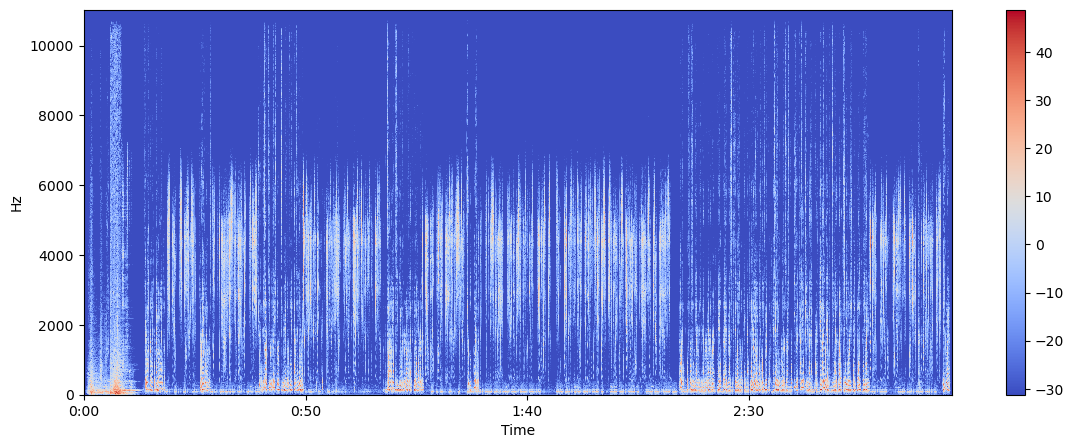

In [58]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

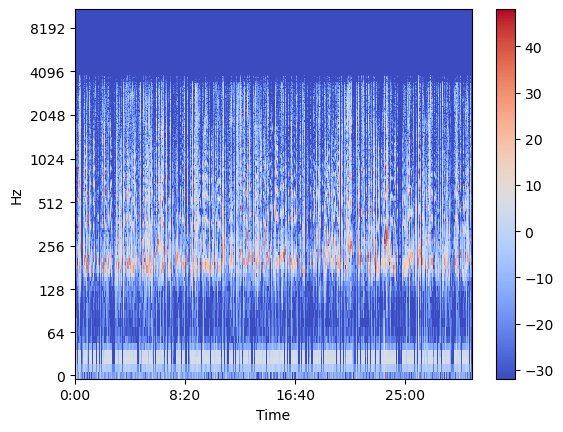

In [13]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [60]:
from pydub import AudioSegment
import speech_recognition as sr


def convert_to_wav(filename):


  """Takes an audio file of non .wav format and converts to .wav"""
  # Import audio file
  audio = AudioSegment.from_file(audio_data)


  # Create new filename
  new_filename = filename.split(".")[0] + ".wav"


  # Export file as .wav|
  audio.export(new_filename, format='wav')
  print(f"Converting {audio_data} to {new_filename}...")

In [61]:
!pip install SpeechRecognition

^C


In [63]:
r = sr.Recognizer()

# use the recognizer to open the audio file
with sr.AudioFile(audio_data) as source:
    # read the audio data from the file
    audio_d = r.record(source)

# use the recognizer to convert the audio data to text
text = r.recognize_google(audio_d, language='en-US')

# print the transcribed text
#print(text)

In [64]:
print(text)

thank you for calling hyperreal list my name is Joshua how may I help you today could you please tell me the tracking number will be sent to your email as well at your full name address and email you provided just to see if my computer and you are currently question tell me about it don't worry I was able to pin down the road of the issue in their work career provider has confirmed via email that your head into your house as we speak so they will be knocking on your door any minute now now regarding your valuable points and apologies I'm here to help and despite there wasn't taking out of your account because I was looking for the invite you needed I was paying Close attention to the regulators you have described and I'm sending it back to the proper person in command right away so that she will be able to address this issue properly and hopefully about this from happening again and you too can we have a nice day


In [67]:
from textblob import TextBlob

In [85]:
blob = TextBlob(text)
sentiment_score = blob.sentiment.polarity

In [86]:
print("Sentiment Score: ", sentiment_score)

Sentiment Score:  0.22546897546897549


We use the sentiment property of the TextBlob object to calculate the sentiment score of the text, which is a number between -1 and 1 representing the overall sentiment of the text. A score of -1 indicates strong negative sentiment, a score of 0 indicates neutral sentiment, and a score of 1 indicates strong positive sentiment.

In [74]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [77]:
sid = SentimentIntensityAnalyzer()
scores = sid.polarity_scores(text)

# Print the sentiment scores
print(scores)

{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.9691}


In [87]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer




# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Clean and preprocess the text data
cleaned_sentences = []
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

for sentence in sentences:
    # Tokenize the sentence into words
    words = word_tokenize(sentence.lower())
    
    # Remove stop words and lemmatize the words
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join the cleaned words back into a sentence
    cleaned_sentence = ' '.join(cleaned_words)
    cleaned_sentences.append(cleaned_sentence)

# Analyze the sentiment of the cleaned sentences
for sentence in cleaned_sentences:
    scores = sid.polarity_scores(sentence)
    print("Sentiment analysis of sentence: '", sentence, "'")
    print(scores)

Sentiment analysis of sentence: ' thank calling hyperreal list name joshua may help today could please tell tracking number sent email well full name address email provided see computer currently question tell n't worry able pin road issue work career provider confirmed via email head house speak knocking door minute regarding valuable point apology 'm help despite n't taking account looking invite needed paying close attention regulator described 'm sending back proper person command right away able address issue properly hopefully happening nice day '
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9698}


<h2>#Audio Based Sentiment Analysis</h2>

In [8]:
import requests
from time import sleep
import pandas as pd

In [75]:
# Obtained in Step 2
API_key = "e089d633fdba469384ac292227f864bd"

## Location on local machine
file = (r'C:\Users\harsh\DATASET\[YT2mp3.info] - _ Customer complains about Customer Service (320kbps).mp3')

In [76]:
#Step 3.3: Specify Upload Endpoint

headers = {
    'authorization': "e089d633fdba469384ac292227f864bd", 
    'content-type': 'application/json',
}

endpoint = 'https://api.assemblyai.com/v2/upload'

In [77]:
#Step 3.4: Define the upload function

def read_file(file):

    with open(file, 'rb') as f:
        while True:
            data = f.read(5_242_880)
            if not data:
                break
            yield data

In [78]:
res_upload = requests.post(
    endpoint, 
    headers=headers, 
    data=read_file(file)
)

print(res_upload.json())

upload_url = res_upload.json().get('upload_url')
{'upload_url': 'https://cdn.assemblyai.com/upload/e089d633fdba469384ac292227f864bd'}

{'upload_url': 'https://cdn.assemblyai.com/upload/f8d1543a-8ba8-4d68-b488-4939336cb3df'}


{'upload_url': 'https://cdn.assemblyai.com/upload/e089d633fdba469384ac292227f864bd'}

In [17]:
endpoint = "https://api.assemblyai.com/v2/transcript"

json = {
    "audio_url": upload_url,
    "sentiment_analysis": True,
    "speaker_labels": True
}

headers = {
    "authorization": API_key,
    "content-type": "application/json"
}

response = requests.post(endpoint, json=json, headers=headers)

response.json()

{'id': 'r92rriv6gu-6984-4cba-8b34-f4e205515232',
 'language_model': 'assemblyai_default',
 'acoustic_model': 'assemblyai_default',
 'language_code': 'en_us',
 'status': 'queued',
 'audio_url': 'https://cdn.assemblyai.com/upload/9f6fe2c3-5954-410f-a7a7-4e239cb804cc',
 'text': None,
 'words': None,
 'utterances': None,
 'confidence': None,
 'audio_duration': None,
 'punctuate': True,
 'format_text': True,
 'dual_channel': None,
 'webhook_url': None,
 'webhook_status_code': None,
 'webhook_auth': False,
 'webhook_auth_header_name': None,
 'speed_boost': False,
 'auto_highlights_result': None,
 'auto_highlights': False,
 'audio_start_from': None,
 'audio_end_at': None,
 'word_boost': [],
 'boost_param': None,
 'filter_profanity': False,
 'redact_pii': False,
 'redact_pii_audio': False,
 'redact_pii_audio_quality': None,
 'redact_pii_policies': None,
 'redact_pii_sub': None,
 'speaker_labels': True,
 'content_safety': False,
 'iab_categories': False,
 'content_safety_labels': {},
 'iab_cate

In [18]:
response_id = response.json()['id']

endpoint = f"https://api.assemblyai.com/v2/transcript/{response_id}"

headers = {
    "authorization": API_key,
}
response = requests.get(endpoint, headers=headers)

response.json()

{'id': 'r92rriv6gu-6984-4cba-8b34-f4e205515232',
 'language_model': 'assemblyai_default',
 'acoustic_model': 'assemblyai_default',
 'language_code': 'en_us',
 'status': 'completed',
 'audio_url': 'https://cdn.assemblyai.com/upload/9f6fe2c3-5954-410f-a7a7-4e239cb804cc',
 'text': "Thank you for calling Hypernario on my store. My name is Joshua, how may I help you today? Hi, Joshua. My name is Caroline. Just by chance am I calling to the Hypernary customer service department? Department? Yeah, sure. My name is Joshua Calboy and I'm on your service. Thanks a lot. Look, I am trying to find out about a package I was supposed to receive three days ago, but I have zero response from your end. So can you help me out, Joshua? Sure Caroline. Just as a matter of procedure, could you please tell me the tracking number we sent to your email as well as your full name, address and email you're provided? Sure. The tracking number is HPN 767890. Okay, the email I provided is Carolinehpn@gmail.com. My fu

In [19]:
current_status = "queued"
response_id = response.json()['id']
endpoint = f"https://api.assemblyai.com/v2/transcript/{response_id}"
headers = {
    "authorization": API_key,
}

while current_status not in ("completed", "error"):
    
    response = requests.get(endpoint, headers=headers)
    current_status = response.json()['status']
    
    if current_status in ("completed", "error"):
        print(response)
    else:
        sleep(10)
        
current_status

<Response [200]>


'completed'

In [20]:
#Sentiment Analysis Result

response.json()

{'id': 'r92rriv6gu-6984-4cba-8b34-f4e205515232',
 'language_model': 'assemblyai_default',
 'acoustic_model': 'assemblyai_default',
 'language_code': 'en_us',
 'status': 'completed',
 'audio_url': 'https://cdn.assemblyai.com/upload/9f6fe2c3-5954-410f-a7a7-4e239cb804cc',
 'text': "Thank you for calling Hypernario on my store. My name is Joshua, how may I help you today? Hi, Joshua. My name is Caroline. Just by chance am I calling to the Hypernary customer service department? Department? Yeah, sure. My name is Joshua Calboy and I'm on your service. Thanks a lot. Look, I am trying to find out about a package I was supposed to receive three days ago, but I have zero response from your end. So can you help me out, Joshua? Sure Caroline. Just as a matter of procedure, could you please tell me the tracking number we sent to your email as well as your full name, address and email you're provided? Sure. The tracking number is HPN 767890. Okay, the email I provided is Carolinehpn@gmail.com. My fu

In [25]:
response.json()["sentiment_analysis_results"][8]

{'text': 'Thanks a lot.',
 'start': 28828,
 'end': 29880,
 'sentiment': 'POSITIVE',
 'confidence': 0.915550708770752,
 'speaker': 'B'}

In [26]:
#Sentiment Analysis Insights --->>>> CSV

sent_data = []

for idx, sentence in enumerate(response.json()["sentiment_analysis_results"]):

    sent = sentence["text"]
    sentiment = sentence["sentiment"]
    duration = (sentence["end"] - sentence["start"]) / 1000
    speaker = sentence["speaker"]
    sent_data.append([idx +1 , sent, duration, speaker, sentiment])

sent_data = pd.DataFrame(sent_data, 
                         columns = ["SentenceID", "Text", "Duration", 
                                    "Speaker", "Sentiment"])

In [32]:
sent_data.head()

,SentenceID,Text,Duration,Speaker,Sentiment
0,1,Thank you for calling Hypernario on my store.,2.356,A,POSITIVE
1,2,"My name is Joshua, how may I help you today?",2.362,A,NEUTRAL
2,3,"Hi, Joshua.",1.030,B,NEUTRAL
3,4,My name is Caroline.,1.488,B,NEUTRAL
4,5,Just by chance am I calling to the Hypernary c...,3.528,B,NEUTRAL


In [35]:
import pandas as pd

# Assume that you have a Pandas DataFrame called "labeled_data" that you want to save as a CSV file.
# You can use the following code to save it as "labeled_data.csv" in your current working directory.
sent_data.to_csv('sent_data.csv', index=False)

In [36]:
#1 Speaker distribution #1 Speaker distribution
#The number of sentences spoken by each of the speakers can be calculated using the value_counts() method as shown below:

sent_data.Speaker.value_counts()

B    29
A    19
Name: Speaker, dtype: int64

In [37]:
100*sent_data.Speaker.value_counts(normalize=True)

B    60.416667
A    39.583333
Name: Speaker, dtype: float64

In [38]:
sent_data.Sentiment.value_counts()

NEUTRAL     27
POSITIVE    13
NEGATIVE     8
Name: Sentiment, dtype: int64

In [39]:
100*sent_data.Sentiment.value_counts(normalize=True)

NEUTRAL     56.250000
POSITIVE    27.083333
NEGATIVE    16.666667
Name: Sentiment, dtype: float64

In [40]:
#Sentiment Distribution on Speaker-level
#Finally, let’s compute the distribution of sentiment across individual speakers. Here, instead of using the groupby() method, we will use crosstab() for better visualization. This is demonstrated below:

print(pd.crosstab(sent_data.Speaker, sent_data.Sentiment))



Sentiment  NEGATIVE  NEUTRAL  POSITIVE
Speaker                               
A                 0       12         7
B                 8       15         6


In [41]:
# Average Sentence Duration on Sentiment-level
#Lastly, we shall compute the average duration of the sentences belonging to the individual sentiment classes. This is implemented below using the groupby() method:
sent_data.groupby("Sentiment").Duration.mean()

Sentiment
NEGATIVE    4.783250
NEUTRAL     4.025407
POSITIVE    2.034308
Name: Duration, dtype: float64